In [1]:
import pandas as pd
import os
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import seaborn as sb
from sklearn.cluster import KMeans as km

In [30]:
file = "E:\\python folder\\Mall_Customers (1).csv"


# Creating Pandas Dataframe

In [31]:
df = pd.read_csv(file)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Creating a Scatterplot using Seaborn

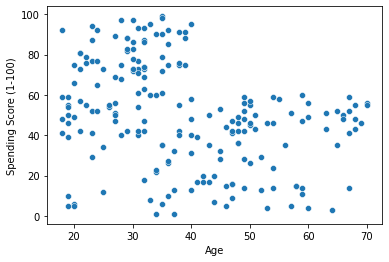

In [33]:
a = sb.scatterplot(y = "Spending Score (1-100)" , x = "Age" , data = df)

# slicing the DataFrame using iloc

In [40]:
x = df.iloc[:,[2,4]]
x

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


# Identifying number of clusters using Elbow Method

In [74]:
noofclusters = []

for a in range(1,15):
    kmean_cul = km(a)
    kmean_cul.fit(x)
    clust = kmean_cul.inertia_
    noofclusters.append(clust)


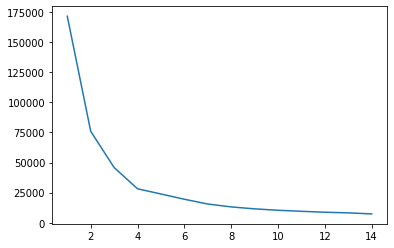

In [75]:
clusters = range(1,15)
noofclusters
a = sb.lineplot(x = clusters , y = noofclusters )

# Creating 8 clusters using K-Means Clustering

In [79]:
kmean = km(8)
kmeans = kmean.fit(x)


In [80]:
clus = kmean.fit_predict(x)
clus

array([6, 0, 2, 0, 6, 0, 2, 4, 5, 0, 5, 4, 5, 0, 2, 0, 1, 0, 1, 4, 1, 0,
       5, 0, 5, 4, 1, 0, 1, 4, 5, 0, 5, 4, 5, 0, 5, 0, 1, 0, 7, 4, 1, 0,
       1, 0, 3, 6, 6, 6, 3, 0, 6, 7, 3, 1, 3, 7, 6, 3, 7, 6, 7, 3, 7, 6,
       3, 7, 6, 6, 7, 3, 7, 7, 7, 6, 3, 3, 6, 3, 7, 3, 7, 3, 6, 3, 3, 6,
       0, 3, 7, 6, 3, 1, 6, 6, 3, 6, 3, 6, 6, 3, 7, 6, 3, 6, 7, 3, 7, 7,
       7, 6, 1, 6, 6, 6, 7, 3, 3, 3, 6, 1, 3, 4, 6, 0, 1, 4, 5, 0, 5, 0,
       6, 0, 2, 4, 5, 0, 2, 0, 5, 4, 6, 4, 2, 4, 1, 0, 2, 4, 5, 4, 5, 0,
       5, 4, 2, 0, 2, 0, 1, 4, 2, 4, 1, 0, 5, 4, 1, 0, 2, 0, 2, 4, 5, 4,
       5, 0, 5, 4, 1, 4, 5, 4, 1, 4, 5, 0, 5, 4, 2, 0, 2, 4, 5, 0, 1, 0,
       2, 4])

In [71]:
a = clus.copy()

# Inserting results of Clustering into Pandas DataFrame

In [72]:
df["no of clusters"] = a
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),no of clusters
0,1,Male,19,15,39,6
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


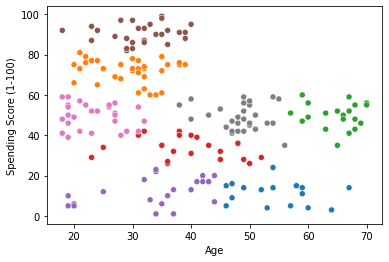

In [88]:
a = sb.scatterplot(y = "Spending Score (1-100)" , x = "Age" , data = df , hue= "no of clusters" , 
                   palette="tab10", legend=None)